In [2]:
import pandas as pd

df = pd.read_csv (r'~/Downloads/values.csv')

In [3]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [4]:
df.describe()

,a,b,c
count,2.930000e+02,293.000000,293.000000
mean,-3.793106e-06,0.097745,-532.208275
std,9.057253e-07,0.017059,87.844236
min,-1.191466e-05,0.062540,-1112.948629
25%,-4.243026e-06,0.086497,-582.197177
50%,-3.729551e-06,0.096546,-526.825773
75%,-3.183655e-06,0.107152,-475.494365
max,-1.884254e-06,0.237608,-363.625559


# Load Values From File

In [21]:
import glob
import numpy as np

path = r'../wed_data/*' # use your path
# path = r'../data_tue/*' # use your path
all_folders = glob.glob(path)


li = []
df_out=pd.DataFrame(columns=['id','real_temp','adc_value'])
df_out_id=pd.DataFrame(columns=['id','tmp_l','adc_l','tmp_m','adc_m','tmp_h','adc_h'])

# dl=pd.DataFrame(columns=['real_temp','header','frimware_adc','col4','col5','col6','col7','col8','col9','col10','col11','col12','col3','col4','col15'])
i=1
j=1
l=1
for folder in all_folders:
    try:
        df=pd.read_csv(folder+'/data.txt', index_col=None, header=None)
        np_low_temp=np.array([])
        np_low_adc=np.array([])
        np_high_temp=np.array([])
        np_high_adc=np.array([])
        np_mid_temp=np.array([])
        np_mid_adc=np.array([])
        for row in df.iterrows():
            try:
                if row[1][3]==265:
                    df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][5])
                else:
                    df_out.loc[i]=folder.split('/')[2],float(row[1][0]),float(row[1][6])
                if df_out.loc[i]['real_temp']<10:
                    np_low_temp = np.append(np_low_temp, df_out.loc[i]['real_temp'])
                    np_low_adc = np.append(np_low_adc, df_out.loc[i]['adc_value'])
                elif df_out.loc[i]['real_temp']>60:
                    np_high_temp = np.append(np_high_temp, df_out.loc[i]['real_temp'])
                    np_high_adc = np.append(np_high_adc, df_out.loc[i]['adc_value'])
                else:
                    np_mid_temp =  np.append(np_mid_temp, df_out.loc[i]['real_temp'])
                    np_mid_adc =  np.append(np_mid_adc, df_out.loc[i]['adc_value'])
                i+=1
            except:
                print (bcolors.WARNING + "Warning: There has Been an error with ID:  "+str(folder.split('/')[2])+ bcolors.ENDC)
                break
        #removing some outliers
    #     if np.average(np_low_adc)<OUTLIER and np.average(np_mid_adc)<OUTLIER and np.average(np_high_adc)<OUTLIER and np.average(np_low_adc)>OUTLIER_LOW and np.average(np_mid_adc)>OUTLIER_LOW and np.average(np_high_adc)>OUTLIER_LOW:
            #probably we could double check the std, to ensure that value of the sensor is good.
        df_out_id.loc[l]= folder.split('/')[2],np.average(np_low_temp),np.average(np_low_adc),np.average(np_mid_temp),np.average(np_mid_adc),np.average(np_high_temp),np.average(np_high_adc)
        l+=1
        if j%50 == 0:
    #         print (bcolors.WARNING+"Printing ID:  "+str(folder.split('/')[2])+bcolors.ENDC)
            print ("Loading file number:........."+str(j))
        j+=1
    except:
        print (bcolors.WARNING + "Error Folder:  "+str(folder.split('/')[2])+ bcolors.ENDC)
    #     df = pd.read_csv(folder+'/data.txt', index_col=None, header=0)
# frame = pd.concat(li, axis=0, ignore_index=True)

/Users/rbol384/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/rbol384/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Loading file number:.........50
Error Folder:  KWG4YF6CCHX6GV835WRL6YG6JX
Loading file number:.........100
Loading file number:.........150
Error Folder:  PYPGHF83L74VVCA3517TN49A9Y
Error Folder:  HQYLJ092A5SZLGSCH0QJ13HGKW
Error Folder:  4M2KBDSDNF41NLLX4JWV24NFVR
Loading file number:.........200
Loading file number:.........250
Error Folder:  186JY28GYPBNXAZMP5HWK58HXT
Loading file number:.........300


In [22]:
df_out_id

,id,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h
1,CDTPTR3387NHV4CQN8MKB0159W,2.00,7856.740741,NaN,NaN,72.7,10399.481481
2,S8JC0FPPQJX4ZW8JV03LMXM31Y,2.50,7918.851852,36.7,8958.000000,69.4,10114.666667
3,YND1P2FW6J1QXDRKRCYZHD29BZ,2.40,7934.407407,37.0,9020.785714,69.5,10238.740741
4,FR1WXG8H25C8JG9HMR8QXYGKMW,2.20,7587.185185,35.2,8565.703704,69.5,9855.142857
5,4MTJ3Y4NW2C5GC8TVAH7AY0KFR,3.00,7834.185185,NaN,NaN,72.2,10191.037037
6,GBY76AYDD275C46N2WSAGMNDCW,2.50,8234.740741,37.5,9300.481481,69.4,10474.703704
7,0H347W5ASL85DSRN2B2DGYALGW,3.20,7998.107143,NaN,NaN,72.6,10319.888889
8,Z48CCLQJW5XDZ9NTLB4V23S85T,2.60,8517.703704,36.7,9547.592593,69.5,10692.392857
9,WJ734NH15666J78W3TMDPLT97W,2.90,7137.444444,NaN,NaN,69.2,9359.740741
10,RGAYT04P1MFY6H16AHSDRR6FPT,2.90,8015.296296,NaN,NaN,69.2,10095.925926


In [23]:
#Clean up
df_out_id=df_out_id.dropna()
df_out=df_out.dropna()

In [24]:
OUTLIER_TOP=15000
OUTLIER_LOW=6000

df_clean=df_out_id.copy()
# df_clean = df_clean.drop(df_out_id[(df_out_id.adc_l > OUTLIER_TOP].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_l > OUTLIER_TOP )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_m > 10000 )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_h > OUTLIER_TOP )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_l < OUTLIER_LOW )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_m < OUTLIER_LOW )].index)
df_clean = df_clean.drop(df_clean[(df_clean.adc_h < OUTLIER_LOW )].index)

df_clean = df_clean.drop(df_clean[(df_clean.tmp_l > 3 )].index)
# df_clean = df_clean.drop(df_clean[(df_clean.tmp_l < 3.2 )].index)
df_clean = df_clean.drop(df_clean[(df_clean.tmp_h > 74)].index)
# df_clean = df_clean.drop(df_clean[(df_clean.tmp_m > 36.1)].index)


# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
# df_clean = df_clean.drop(df_out_id[(df_out_id.tmp_l > 2 & )].index)
df_clean=df_clean.dropna()


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 2 to 314
Data columns (total 7 columns):
id       108 non-null object
tmp_l    108 non-null float64
adc_l    108 non-null float64
tmp_m    108 non-null float64
adc_m    108 non-null float64
tmp_h    108 non-null float64
adc_h    108 non-null float64
dtypes: float64(6), object(1)
memory usage: 6.8+ KB


In [26]:
df_out_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 314
Data columns (total 7 columns):
id       112 non-null object
tmp_l    112 non-null float64
adc_l    112 non-null float64
tmp_m    112 non-null float64
adc_m    112 non-null float64
tmp_h    112 non-null float64
adc_h    112 non-null float64
dtypes: float64(6), object(1)
memory usage: 7.0+ KB


In [27]:
df_out_id.head(15)

,id,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h
2,S8JC0FPPQJX4ZW8JV03LMXM31Y,2.5,7918.851852,36.7,8958.000000,69.4,10114.666667
3,YND1P2FW6J1QXDRKRCYZHD29BZ,2.4,7934.407407,37.0,9020.785714,69.5,10238.740741
4,FR1WXG8H25C8JG9HMR8QXYGKMW,2.2,7587.185185,35.2,8565.703704,69.5,9855.142857
6,GBY76AYDD275C46N2WSAGMNDCW,2.5,8234.740741,37.5,9300.481481,69.4,10474.703704
8,Z48CCLQJW5XDZ9NTLB4V23S85T,2.6,8517.703704,36.7,9547.592593,69.5,10692.392857
11,VX18YS4RAB94N93M77B2YQHDLX,2.6,7699.444444,37.0,8856.592593,69.4,10084.000000
14,GQG3ZRLS4KZX244SWM4K3B60NW,2.1,7185.444444,36.1,8203.928571,69.6,9427.111111
18,40MH2HDTDDYZ1670XCR6Q8CZ4T,2.6,7893.481481,36.9,8930.666667,69.5,10123.107143
26,C35A7DRZ9K1C21N69YTHANVBQV,2.3,8042.185185,36.9,9116.629630,69.6,10370.185185
35,6KN8CQW97ZFQBZDQ385KV84RFZ,2.4,8017.500000,36.3,9000.740741,69.6,10199.500000


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 2 to 314
Data columns (total 7 columns):
id       108 non-null object
tmp_l    108 non-null float64
adc_l    108 non-null float64
tmp_m    108 non-null float64
adc_m    108 non-null float64
tmp_h    108 non-null float64
adc_h    108 non-null float64
dtypes: float64(6), object(1)
memory usage: 6.8+ KB


In [60]:
df_clean['n_m']=0
df_clean['n_l']=df_clean['adc_l']-df_clean['adc_m']
df_clean['n_h']=df_clean['adc_h']-df_clean['adc_m']

In [61]:
df_clean.describe()

,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h,n_l,n_m,n_h
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0,108.000000
mean,2.401389,7849.623356,36.221759,8871.030895,69.532407,10087.914252,-1021.407539,0.0,1216.883357
std,0.231660,418.331892,0.863764,421.847524,0.318826,420.299118,51.941292,0.0,56.841137
min,2.000000,7060.703704,34.800000,8057.814815,68.600000,9298.592593,-1157.148148,0.0,1070.629630
25%,2.200000,7534.314815,35.400000,8576.870370,69.400000,9774.101852,-1059.240741,0.0,1176.102183
50%,2.500000,7810.648148,36.400000,8873.000000,69.500000,10064.192308,-1021.497151,0.0,1211.018519
75%,2.600000,8126.638889,36.925000,9151.453704,69.600000,10375.092593,-978.851852,0.0,1260.231481
max,2.900000,8914.892857,37.500000,9905.222222,72.500000,11218.555556,-903.148148,0.0,1350.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ddf6fd0>,
      dtype=object)

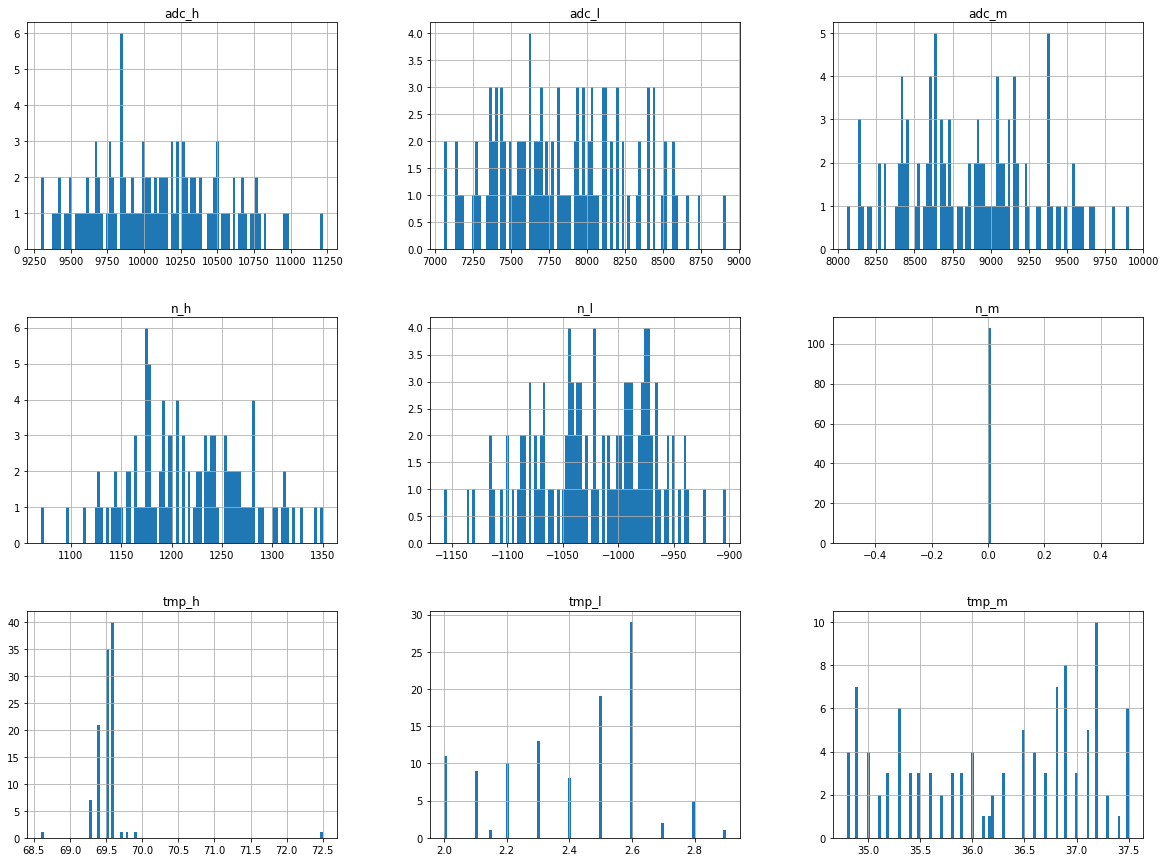

In [62]:
df_clean.hist(bins=100, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dcf42b0>,
      dtype=object)

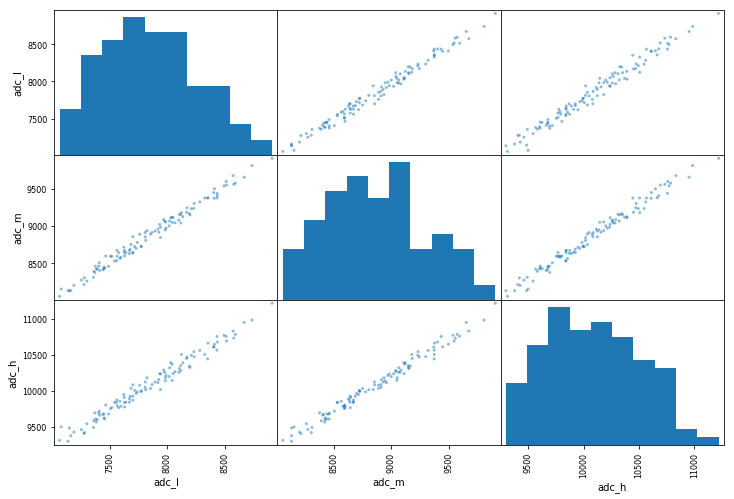

In [63]:
from pandas.plotting import scatter_matrix

attributes = ["adc_l", "adc_m", "adc_h"]
scatter_matrix(df_clean[attributes],  figsize=(12, 8))

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dda8dd8>,
      dtype=object)

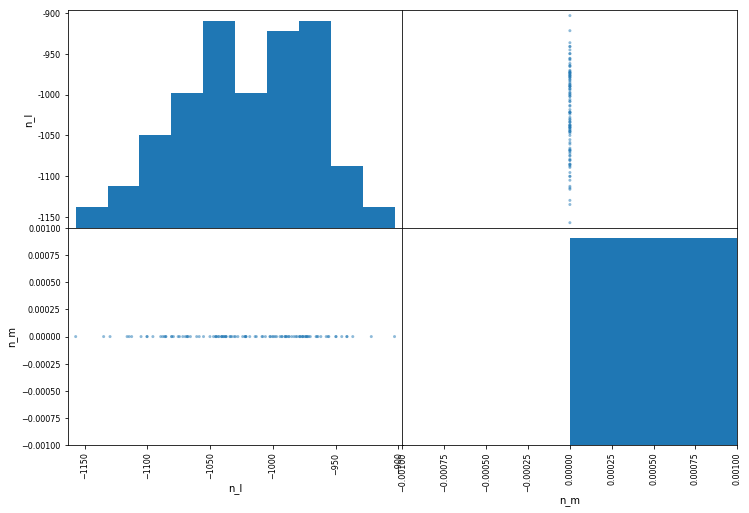

In [64]:
from pandas.plotting import scatter_matrix

attributes = ["n_l", "n_m"]
scatter_matrix(df_clean[attributes], figsize=(12, 8))

In [65]:
corr_matrix = df_clean.corr()
corr_matrix["adc_m"].sort_values(ascending=False)

adc_m    1.000000
adc_l    0.992391
adc_h    0.990895
tmp_m    0.149216
tmp_l    0.066308
n_h     -0.094563
n_l     -0.128967
tmp_h   -0.130278
n_m           NaN
Name: adc_m, dtype: float64

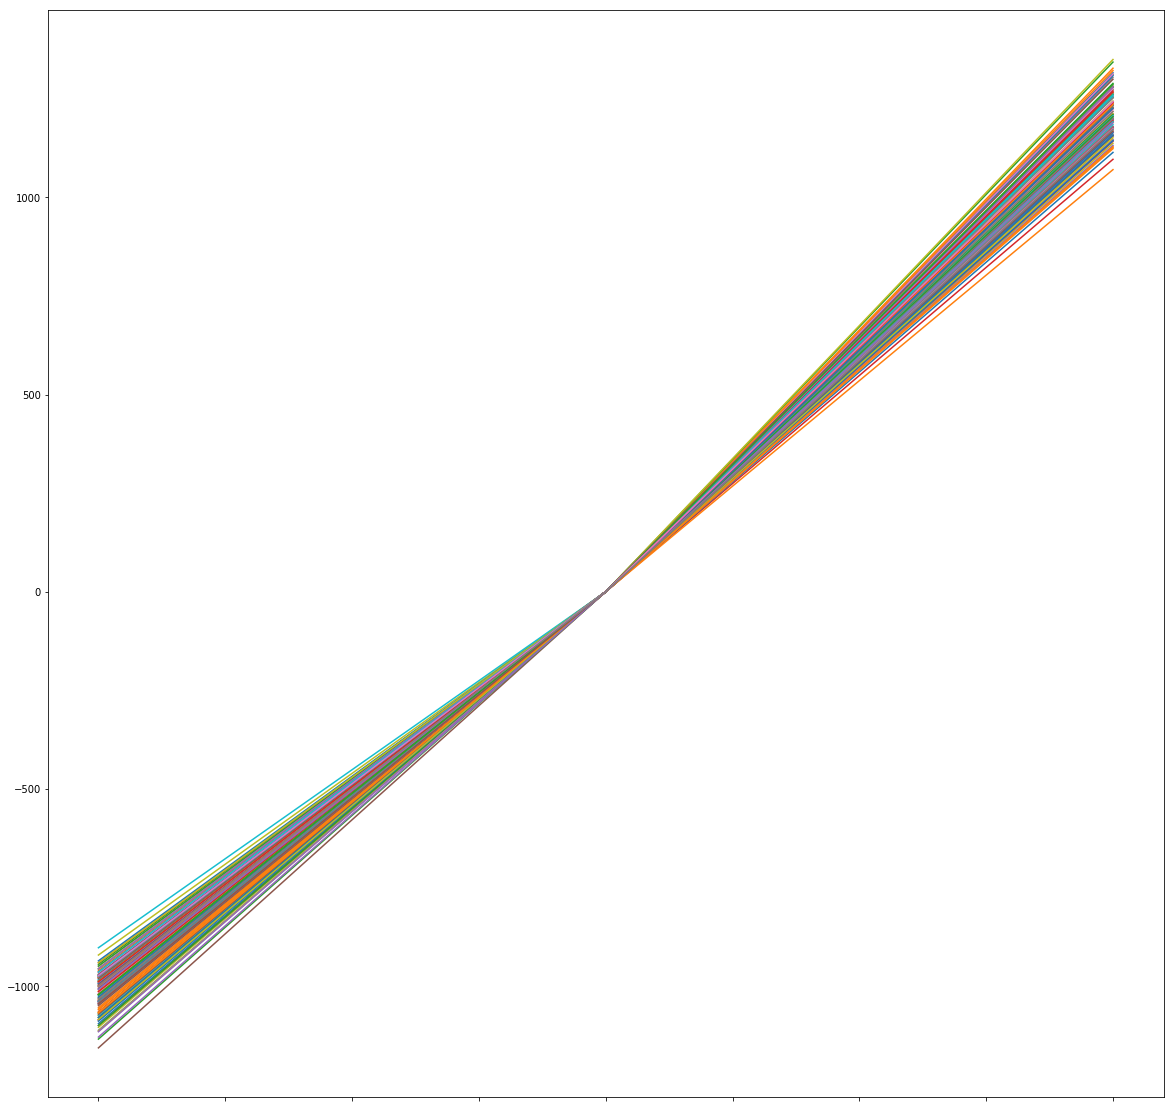

In [66]:
df=df_clean.drop(columns=['tmp_l','tmp_m','tmp_h','id'])
df=df.drop(columns=['adc_l','adc_m','adc_h'])

df.T.plot(figsize=(20, 20),legend=False)

In [67]:
df.T

,2,3,4,6,8,11,14,18,26,35,...,292,293,294,295,299,303,304,311,312,314
n_l,-1039.148148,-1086.378307,-978.518519,-1065.740741,-1029.888889,-1157.148148,-1018.484127,-1037.185185,-1074.444444,-983.240741,...,-1085.259259,-974.629630,-973.481481,-1068.222222,-1022.000000,-989.518519,-1129.777778,-1045.074074,-973.796296,-999.555556
n_m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n_h,1156.666667,1217.955026,1289.439153,1174.222222,1144.800265,1227.407407,1223.182540,1192.440476,1253.555556,1198.759259,...,1151.259259,1260.222222,1226.481481,1123.814815,1287.074074,1240.888889,1189.515670,1168.776455,1243.462963,1173.111111


In [68]:
df_clean.describe()

,tmp_l,adc_l,tmp_m,adc_m,tmp_h,adc_h,n_l,n_m,n_h
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0,108.000000
mean,2.401389,7849.623356,36.221759,8871.030895,69.532407,10087.914252,-1021.407539,0.0,1216.883357
std,0.231660,418.331892,0.863764,421.847524,0.318826,420.299118,51.941292,0.0,56.841137
min,2.000000,7060.703704,34.800000,8057.814815,68.600000,9298.592593,-1157.148148,0.0,1070.629630
25%,2.200000,7534.314815,35.400000,8576.870370,69.400000,9774.101852,-1059.240741,0.0,1176.102183
50%,2.500000,7810.648148,36.400000,8873.000000,69.500000,10064.192308,-1021.497151,0.0,1211.018519
75%,2.600000,8126.638889,36.925000,9151.453704,69.600000,10375.092593,-978.851852,0.0,1260.231481
max,2.900000,8914.892857,37.500000,9905.222222,72.500000,11218.555556,-903.148148,0.0,1350.000000


In [69]:
high_tmp_mean=df_clean.describe()['tmp_h']['mean']
low_tmp_mean=df_clean.describe()['tmp_l']['mean']
n_l_mean=df_clean.describe()['n_l']['mean']
n_h_mean=df_clean.describe()['n_h']['mean']
# print(str(high_tmp_mean)+str(", ")+str(low_tmp_mean)+str(", ")+str(n_h_mean)+str(", ")+str(n_l_mean))
ratio=(high_tmp_mean-low_tmp_mean)/(n_h_mean-n_l_mean)
#68 degrees/2000
print(bcolors.HEADER +"*********************************************")
print("*********************************************")
print("By Subtracting the average to the measurments")
print("*********************************************")
print("*********************************************"+bcolors.ENDC)


print("For the High Temperatures")
print("Standard Deviation is:= "+str(df_clean.describe()['n_h']['std'])+" Which Translates to:= "+str(df_clean.describe()['n_h']['std']*ratio)+ "  degrees")
print("\n50% of the data will be beweeen := "+str((df_clean.describe()['n_h']['mean']-df_clean.describe()['n_h']['75%'])*ratio)+" degrees of Error")
print("................................:= "+str((df_clean.describe()['n_h']['mean']-df_clean.describe()['n_h']['25%'])*ratio)+" degrees of Error")


print("\n\nFor the Mid Temperatures")
print("Standard Deviation is:= "+str(df_clean.describe()['n_m']['std'])+" Which Translates to:= "+str(df_clean.describe()['n_m']['std']*ratio)+ "  degrees")
print("\n50% of the data will be beweeen := "+str((df_clean.describe()['n_m']['mean']-df_clean.describe()['n_m']['75%'])*ratio)+" degrees of Error")
print("...............................:= "+str((df_clean.describe()['n_m']['mean']-df_clean.describe()['n_m']['25%'])*ratio)+" degrees of Error")


print("\n\nFor the Low Temperatures")
print("Standard Deviation is:= "+str(df_clean.describe()['n_l']['std'])+" Which Translates to:= "+str(df_clean.describe()['n_l']['std']*ratio)+ "  degrees")
print("\n50% of the data will be beweeen := "+str((df_clean.describe()['n_l']['mean']-df_clean.describe()['n_l']['75%'])*ratio)+" degrees of Error")
print("...............................:= "+str((df_clean.describe()['n_l']['mean']-df_clean.describe()['n_l']['25%'])*ratio)+" degrees of Error")


print ("STD -2")

print ("L_temp:==+/- "+ str(df_clean.describe()['n_l']['std']*2*ratio))
print ("M_temp:==+/- "+ str(df_clean.describe()['n_m']['std']*2*ratio))
print ("H_temp:==+/- "+ str(df_clean.describe()['n_h']['std']*2*ratio))



print("\n\n100 points ADC==" +str(100*ratio)+" degrees")
#     ratio
# (df_clean.describe()['tmp_h']['mean']-df_clean.describe()['tmp_l']['mean'])/(df_clean.describe()['n_h']['mean']-df_clean.describe()['n_l']['mean'])
# df_clean.describe()['n_l']['mean']

*********************************************
*********************************************
By Subtracting the average to the measurments
*********************************************
*********************************************
For the High Temperatures
Standard Deviation is:= 56.841136880210186 Which Translates to:= 1.7047844046239014  degrees

50% of the data will be beweeen := -1.3001007782964025 degrees of Error
................................:= 1.2231125963793377 degrees of Error


For the Mid Temperatures
Standard Deviation is:= 0.0 Which Translates to:= 0.0  degrees

50% of the data will be beweeen := 0.0 degrees of Error
...............................:= 0.0 degrees of Error


For the Low Temperatures
Standard Deviation is:= 51.94129154269511 Which Translates to:= 1.557827809894476  degrees

50% of the data will be beweeen := -1.2763339278236898 degrees of Error
...............................:= 1.134696737724727 degrees of Error
STD -2
L_temp:==+/- 3.115655619788952
M_temp:

In [70]:
df_scaled.plot( figsize=(12, 8), legend=False)

NameError: name 'df_scaled' is not defined

In [ ]:
plt.scatter(df_clean['tmp_h'], df_clean['n_h'], s=0.1, c="b", alpha=0.5)

In [ ]:
plt.scatter(df_clean['tmp_l'], df_clean['n_l'], s=0.1, c="b", alpha=0.5)

In [ ]:
df_clean

In [ ]:
df_out['real_temp'].describe()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
x = df_out['real_temp']
y = df_out['adc_value']
# s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(df_clean, y, s=0.1, c="b", alpha=0.5)
plt.xlabel("RealTemperature")
plt.ylabel("ADC")
plt.legend(loc='upper left')
plt.show()

In [ ]:
##ML

In [45]:
df_norm[]

SyntaxError: invalid syntax (<ipython-input-45-87bdf9f879dd>, line 1)